In [ ]:
import pandas as pd
import numpy as np
import re
import spacy
from nltk.corpus import stopwords
import nltk
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

In [ ]:
# 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df = pd.read_csv('Go Russia.csv')

# 2. –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö
print("–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:")
print(df.head())
print("\n–ö–æ–ª–æ–Ω–∫–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞:")
print(df.columns)
print("\n–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ:")
df.info()

# 3. –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
df = df.dropna(subset=['–¢–µ–∫—Å—Ç'])
df['–¢–µ–∫—Å—Ç'] = df['–¢–µ–∫—Å—Ç'].astype(str)

# 4. –†–∞—Å—Å—á—ë—Ç –æ—Å–Ω–æ–≤–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
df['char_length'] = df['–¢–µ–∫—Å—Ç'].apply(len)  # –î–ª–∏–Ω–∞ –≤ —Å–∏–º–≤–æ–ª–∞—Ö
df['word_count'] = df['–¢–µ–∫—Å—Ç'].apply(lambda x: len(x.split()))  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤
df['unique_words'] = df['–¢–µ–∫—Å—Ç'].apply(lambda x: len(set(x.split())))  # –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ —Å–ª–æ–≤–∞
df['lexical_diversity'] = df.apply(
    lambda x: x['unique_words'] / x['word_count'] if x['word_count'] > 0 else 0,
    axis=1
)  # –õ–µ–∫—Å–∏—á–µ—Å–∫–æ–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ
df['avg_word_length'] = df['–¢–µ–∫—Å—Ç'].apply(
    lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0
)  # –°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Å–ª–æ–≤–∞

# 5. –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—É
total_texts = len(df)
avg_char_length = df['char_length'].mean()
avg_word_count = df['word_count'].mean()

print("\n" + "="*50)
print(f"–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–∫—Å—Ç–æ–≤: {total_texts}")
print(f"–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–∞ –≤ —Å–∏–º–≤–æ–ª–∞—Ö: {avg_char_length:.2f}")
print(f"–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ —Ç–µ–∫—Å—Ç–µ: {avg_word_count:.2f}")
print(f"–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤: {df['unique_words'].mean():.2f}")
print(f"–°—Ä–µ–¥–Ω–µ–µ –ª–µ–∫—Å–∏—á–µ—Å–∫–æ–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ: {df['lexical_diversity'].mean():.4f}")
print(f"–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Å–ª–æ–≤–∞: {df['avg_word_length'].mean():.2f} —Å–∏–º–≤–æ–ª–æ–≤")
print("="*50)

–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:
                                           –ó–∞–≥–æ–ª–æ–≤–æ–∫  \
0                     –†–∞–±–æ—Ç–∞ –Ω–∞ –Æ–≥–µ. –¢–û–ü-15 –í–∞–∫–∞–Ω—Å–∏–π   
1  –ö—É–¥–∞ –¥–µ—Ç–∏ –ø–µ—Ä–µ–≤–æ–∑—è—Ç —Å–≤–æ–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π? –ì–¥–µ –ø—Ä–æ–≤–µ...   
2         –ì–æ–ª–æ–≤–æ–π –Ω–∞ –º–æ—Ä–µ, "–æ–¥–Ω–∏–º –º–µ—Å—Ç–æ–º" –Ω–∞ –¥–∏–≤–∞–Ω–µ.   
3                       –õ—É—á—à–∏–π –≥–æ—Ä–æ–¥ –†–æ—Å—Å–∏–∏. –†–µ–π—Ç–∏–Ω–≥   
4                               –ñ–∏—Ç—å —É –º–æ—Ä—è –ø–æ–ª–µ–∑–Ω–æ.   

                                               –¢–µ–∫—Å—Ç  \
0  –°—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ñ–µ—Ä–∞ –Ω–∞ —é–≥–µ —Ä–∞–∑–≤–∏–≤–∞–µ—Ç—Å—è —Å–µ–º–∏–º–∏–ª—å...   
1  –ö–ª–∏–º–∞—Ç –º–æ—Ä—Å–∫–æ–π –ø–æ–ª–µ–∑–µ–Ω –¥–ª—è –≤—Å–µ—Ö. –û—á–µ–Ω—å —á–∞—Å—Ç–æ –º...   
2  –ï—Å–ª–∏ –≤—ã –≤ —ç—Ç–∏ –¥–Ω–∏ –Ω–µ –Ω–∞ –º–æ—Ä–µ–Ω–µ —Ä–∞—Å—Å—Ç—Ä–∞–∏–≤–∞–π—Ç–µ—Å—å...   
3  –¢—ã –≤—Å–µ –µ—â—ë –∏—â–µ—à—å –ª—É—á—à–∏–π –≥–æ—Ä–æ–¥ –†–æ—Å—Å–∏–∏? –ë–ª–æ–≥–µ—Ä-—É...   
4  –Ø —Ç—É—Ç –Ω–∞—Ç–∫–Ω—É–ª—Å—è –Ω–∞ —Å—Ç–∞—Ç—å—é –ø—Ä–

In [ ]:
!pip install -U spacy
!python -m spacy download ru_core_news_sm


nltk.download('stopwords')
nlp = spacy.load("ru_core_news_sm", disable=["parser", "ner"])
russian_stopwords = stopwords.words('russian')

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15.3/15.3 MB 63.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 54.1/54.1 kB 3.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.4/8.4 MB 77.6 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#  –§—É–Ω–∫—Ü–∏—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞
def preprocess_text(text):
    # –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    text = text.lower()

    # –£–¥–∞–ª–µ–Ω–∏–µ —Å–ø–µ—Ü—Å–∏–º–≤–æ–ª–æ–≤ –∏ —Ü–∏—Ñ—Ä
    text = re.sub(r'[^–∞-—è—ë\s]', '', text, flags=re.IGNORECASE)

    # –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –∏ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é spacy
    doc = nlp(text)
    lemmas = [
        token.lemma_ for token in doc
        if token.text not in russian_stopwords
        and len(token.text) > 2
        and token.is_alpha
    ]

    return ' '.join(lemmas)

#  –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞
print("\n–ù–∞—á–∞–ª–æ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞...")
combined_texts = (df['–ó–∞–≥–æ–ª–æ–≤–æ–∫'].fillna('') + ' ' + df['–¢–µ–∫—Å—Ç'].fillna(''))
tqdm.pandas(desc="–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤")
df['processed_text'] = combined_texts.progress_apply(preprocess_text)
print("–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞!")

#  –°–æ–∑–¥–∞–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
print("\n–°–æ–∑–¥–∞–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–π —Ç–µ–∫—Å—Ç–æ–≤...")
texts = df['processed_text'].tolist()
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(texts, show_progress_bar=True, batch_size=32)
print(f"–°–æ–∑–¥–∞–Ω–æ {len(embeddings)} –≤–µ–∫—Ç–æ—Ä–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–π —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å—é {embeddings.shape[1]}")


–ù–∞—á–∞–ª–æ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞...


–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2849/2849 [01:09<00:00, 40.76it/s]


–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞!

–°–æ–∑–¥–∞–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–π —Ç–µ–∫—Å—Ç–æ–≤...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/90 [00:00<?, ?it/s]

–°–æ–∑–¥–∞–Ω–æ 2849 –≤–µ–∫—Ç–æ—Ä–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–π —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å—é 384


In [ ]:
# —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤
print("\n–ü—Ä–∏–º–µ—Ä —Ç–µ–∫—Å—Ç–∞ –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏:")
print(combined_texts.iloc[0])
print("\n–ü—Ä–∏–º–µ—Ä —Ç–µ–∫—Å—Ç–∞ –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏:")
print(df['processed_text'].iloc[0])


–ü—Ä–∏–º–µ—Ä —Ç–µ–∫—Å—Ç–∞ –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏:
–†–∞–±–æ—Ç–∞ –Ω–∞ –Æ–≥–µ. –¢–û–ü-15 –í–∞–∫–∞–Ω—Å–∏–π –°—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ñ–µ—Ä–∞ –Ω–∞ —é–≥–µ —Ä–∞–∑–≤–∏–≤–∞–µ—Ç—Å—è —Å–µ–º–∏–º–∏–ª—å–Ω—ã–º–∏ —à–∞–≥–∞–º–∏. –ï—Å–ª–∏ –≤—ã —Å–ø–µ—Ü. –≤ –∫–∞–∫–æ–π-–ª–∏–±–æ —Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω–æ–π —Å—Ñ–µ—Ä–∞ –¥–ª—è –≤–∞—Å –≤—Å–µ–≥–¥–∞ –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –¥–∏–∑–∞–π–Ω –∏–Ω—Ç–µ—Ä—å–µ—Ä–∞ –ª–∞–Ω–¥—à–∞—Ñ—Ç–Ω—ã–π –¥–∏–∑–∞–π–Ω –∏ —Ç–¥ –ê–≥–µ–Ω—Å—Ç–≤–∞ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏. –ù–∞ –Æ–≥–µ –∫–æ–º–∏—Å—Å–∏—é –ø–ª–∞—Ç–∏—Ç –Ω–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å –∞ –ø—Ä–æ–¥–∞–≤–µ—Ü. –ù–æ –Ω–µ —Å—Ç—Ä–æ–π—Ç–µ –∏–ª–ª—é–∑–∏–π –µ—Å–ª–∏ —É –≤–∞—Å –Ω–µ—Ç –æ–ø—ã—Ç–∞ –≤–µ—Ä–æ—è—Ç–Ω–µ–µ –≤—Å–µ–≥–æ –∏ –Ω—É –±—É–¥–µ—Ç –ø—Ä–æ–¥–∞–∂. –ü–æ—ç—Ç–æ–º—É –Ω—É–∂–Ω–æ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –ø—Ä–æ—Ö–æ–¥–∏—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –æ–±—É—á–µ–Ω–∏—è –≤ —ç—Ç–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ –∏ –∫–æ–Ω–µ—á–Ω–æ –∂–µ –∑–Ω–∞—Ç—å –≥–æ—Ä–æ–¥. –°—Ñ–µ—Ä–∞ –û—Ç–µ–ª–µ–π –∏ –°–∞–Ω–∞—Ç–æ—Ä–∏–µ–≤. –ó–¥–µ—Å—å –∏—Ö –±–æ–ª–µ–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE
import numpy as np


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–ª—è 2 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤...
–ö–ª–∞—Å—Ç–µ—Ä–æ–≤: 2 | inertia: 14287 | Silhouette avg: 0.069


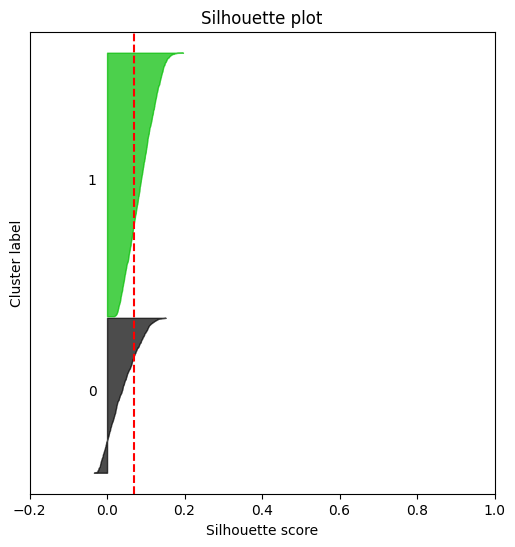


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–ª—è 3 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤...
–ö–ª–∞—Å—Ç–µ—Ä–æ–≤: 3 | inertia: 13706 | Silhouette avg: 0.049


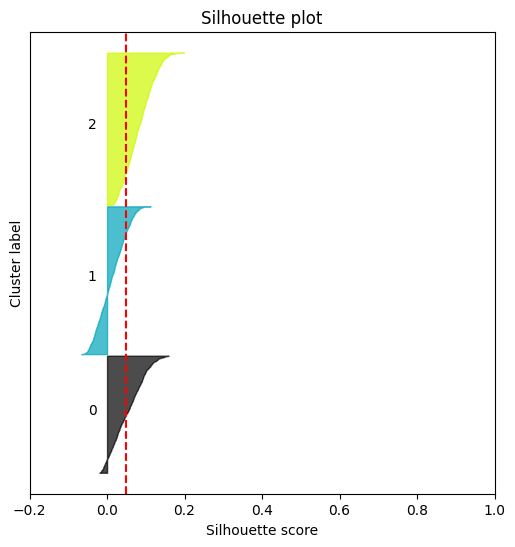


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–ª—è 4 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤...
–ö–ª–∞—Å—Ç–µ—Ä–æ–≤: 4 | inertia: 13247 | Silhouette avg: 0.047


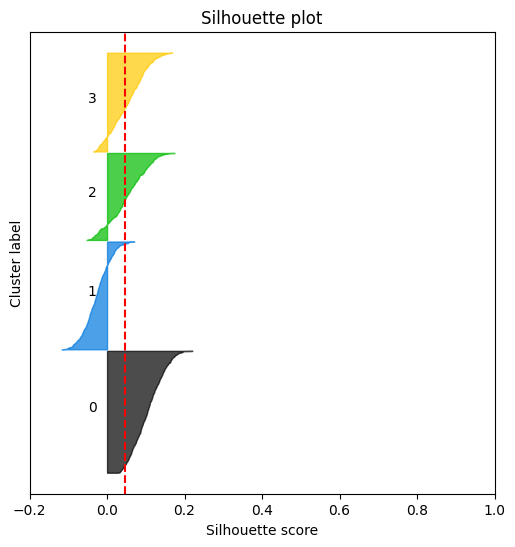


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–ª—è 5 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤...
–ö–ª–∞—Å—Ç–µ—Ä–æ–≤: 5 | inertia: 12960 | Silhouette avg: 0.051


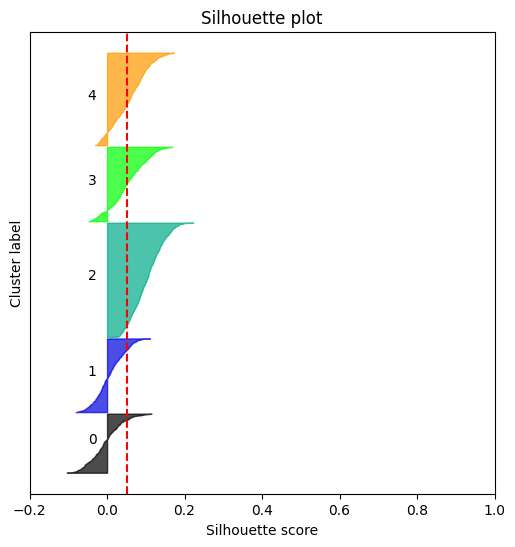


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–ª—è 6 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤...
–ö–ª–∞—Å—Ç–µ—Ä–æ–≤: 6 | inertia: 12735 | Silhouette avg: 0.049


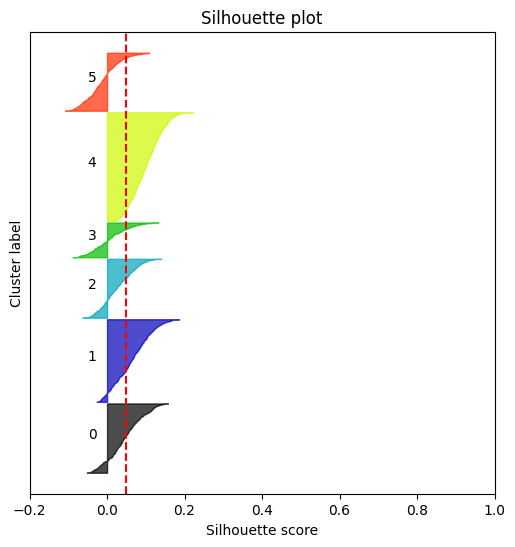


–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–ª—è 7 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤...
–ö–ª–∞—Å—Ç–µ—Ä–æ–≤: 7 | inertia: 12515 | Silhouette avg: 0.042


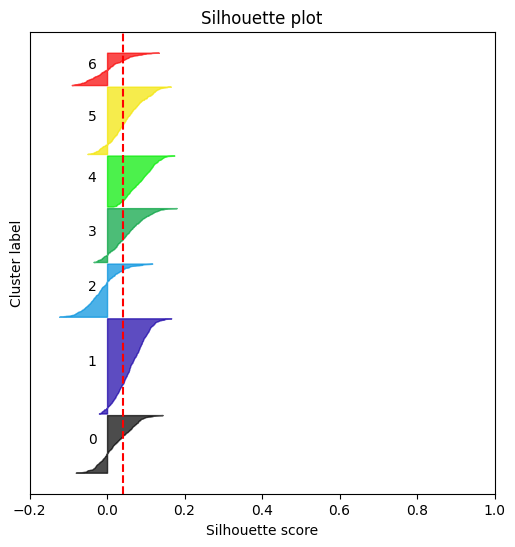

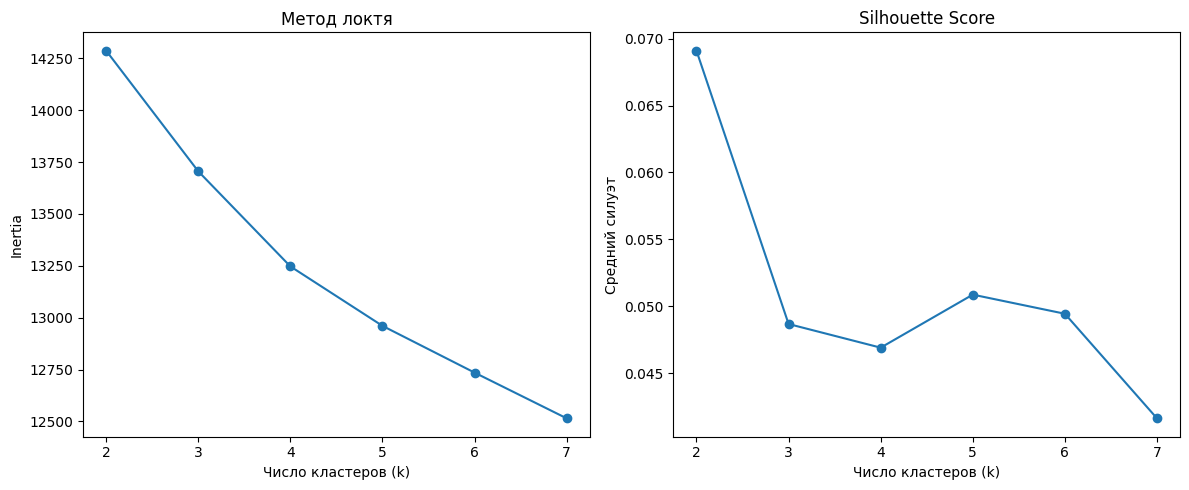


–í–≤–µ–¥–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤: 4

–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Å 4 –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏...
–°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å –ø–æ–º–æ—â—å—é t-SNE...


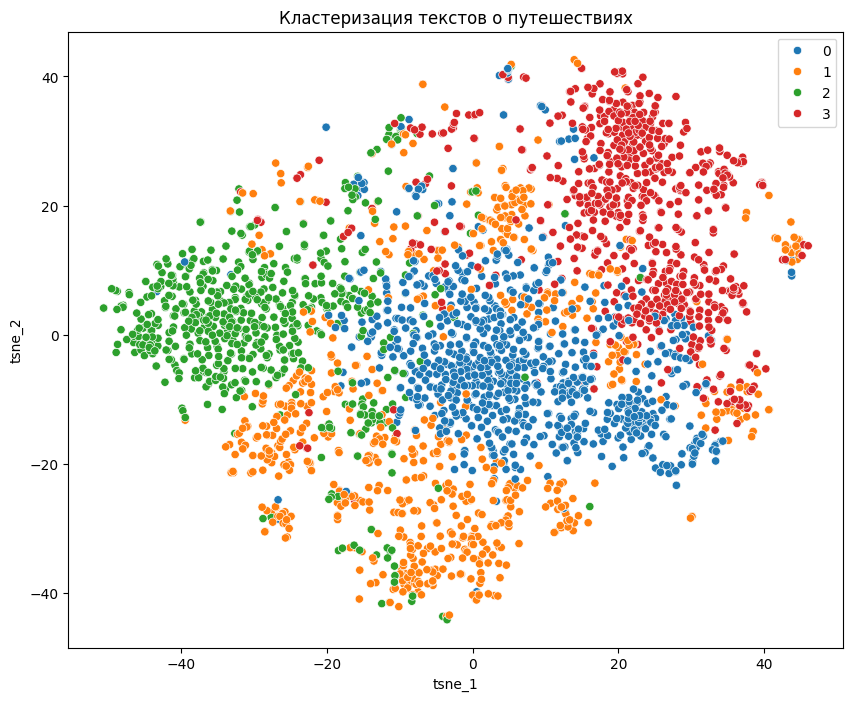

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ Go_Russia_clusters.csv

–ü—Ä–∏–º–µ—Ä—ã —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º:

Cluster 0 (836 —Ç–µ–∫—Å—Ç–æ–≤):
 1. –ú–∞—è–∫ –†—É–¥–Ω—ã–π
 2. –î–æ–ª–∏ÃÅ–Ω–∞ –≥–µÃÅ–π–∑–µ—Ä–æ–≤
 3. –õ–µ—Å—Ç–Ω–∏—Ü–∞ 800 —Å—Ç—É–ø–µ–Ω–µ–π
 4. –°–∞–ª—Ç–∏–Ω—Å–∫–∏–π –≤–æ–¥–æ–ø–∞–¥ ‚Äî –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π –≤ –î–∞–≥–µ—Å—Ç–∞–Ω–µ –ø–æ–¥–∑–µ–º–Ω—ã–π –≤–æ–¥–æ–ø–∞–¥üó∫Ô∏è:
 5. –•—Ä–µ–±–µ—Ç –ú–∞–ª—ã–µ –ë–∞–º–±–∞–∫–∏, –Ω–µ–¥–∞–ª–µ–∫–æ –æ—Ç –ü—Å–µ–±–∞—è –≤ –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–æ–º –∫—Ä–∞–µ

Cluster 1 (739 —Ç–µ–∫—Å—Ç–æ–≤):
 1. –ü–æ—á–µ–º—É –ª—é–¥–∏ –ø–µ—Ä–µ–µ–∑–∂–∞—é—Ç –≤ –¥—Ä—É–≥–∏–µ –≥–æ—Ä–æ–¥–∞
 2. –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π —Å—Ç–∞–ª —Å–∞–º—ã–º –ø—Ä–∏–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–º —Ä–µ–≥–∏–æ–Ω–æ–º –¥–ª—è –ø–µ—Ä–µ–µ–∑–¥–∞
 3. –ö–∞–∫ —Ä–æ—Å—Å–∏—è–Ω–µ —ç–∫–æ–Ω–æ–º—è—Ç –Ω–∞ —Ç—É—Ä–∞—Ö
 4. –†–∞–∑–≤–∏—Ç–∏–µ —Ç—É—Ä–∏–∑–º–∞ –≤ –ê–ª—Ç–∞–π—Å–∫–æ–º –∫—Ä–∞–µ –ø—Ä–∏–≤–ª–µ–∫–ª–æ –≤ –±—é–¥–∂–µ—Ç —Ä–µ–≥–∏–æ–Ω–∞ 2 –º–ª—Ä–¥ —Ä—É–±–ª–µ–π
 5. –°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ —Ç—Ä–∞—Å—Å—ã –

In [ ]:
# ---- –§–£–ù–ö–¶–ò–Ø –°–ò–õ–£–≠–¢–ù–û–ì–û –ì–†–ê–§–ò–ö–ê ----
def plot_silhouettes(samples_silhouettes, labels, n_clusters, silhouette_avg):
    fig, ax = plt.subplots(figsize=(6, 6))
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = samples_silhouettes[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for spacing between silhouette plots

    ax.set_title("Silhouette plot")
    ax.set_xlabel("Silhouette score")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.2, 1.1, 0.2))
    plt.show()

# ---- –ü–û–ò–°–ö –û–ü–¢–ò–ú–ê–õ–¨–ù–û–ì–û –ß–ò–°–õ–ê –ö–õ–ê–°–¢–ï–†–û–í, –°–ò–õ–£–≠–¢–ù–´–ï –ì–†–ê–§–ò–ö–ò ----
K = range(2, 8)
inertias = []
silhouette_avgs = []

for k in K:
    print(f"\n–û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–ª—è {k} –∫–ª–∞—Å—Ç–µ—Ä–æ–≤...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(embeddings, labels)
    silhouette_avgs.append(silhouette_avg)
    inertias.append(inertia)
    print(f"–ö–ª–∞—Å—Ç–µ—Ä–æ–≤: {k} | inertia: {inertia:.0f} | Silhouette avg: {silhouette_avg:.3f}")

    # –°—á–∏—Ç–∞–µ–º —Å–∏–ª—É—ç—Ç—ã –¥–ª—è –≤—Å–µ—Ö —Ç–æ—á–µ–∫
    samples_silhouettes = silhouette_samples(embeddings, labels)

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å–∏–ª—É—ç—Ç–Ω–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ k
    plot_silhouettes(samples_silhouettes, labels, k, silhouette_avg)

# –ì—Ä–∞—Ñ–∏–∫–∏ –ª–æ–∫—Ç—è –∏ —Å–∏–ª—É—ç—Ç–∞
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, marker='o')
plt.xlabel('–ß–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (k)')
plt.ylabel('Inertia')
plt.title('–ú–µ—Ç–æ–¥ –ª–æ–∫—Ç—è')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_avgs, marker='o')
plt.xlabel('–ß–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (k)')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–π —Å–∏–ª—É—ç—Ç')
plt.title('Silhouette Score')
plt.tight_layout()
plt.show()

# –í–´–ë–û–† –ß–ò–°–õ–ê –ö–õ–ê–°–¢–ï–†–û–í –ø–æ –∞–Ω–∞–ª–∏–∑—É –≥—Ä–∞—Ñ–∏–∫–æ–≤
NUM_CLUSTERS = int(input("\n–í–≤–µ–¥–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤: "))

# 4. –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Å –≤—ã–±—Ä–∞–Ω–Ω—ã–º —á–∏—Å–ª–æ–º –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
print(f"\n–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Å {NUM_CLUSTERS} –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏...")
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings)
df['cluster'] = clusters

# 5. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç–∏
print("–°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å –ø–æ–º–æ—â—å—é t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
emb_2d = tsne.fit_transform(embeddings)

df['tsne_1'] = emb_2d[:, 0]
df['tsne_2'] = emb_2d[:, 1]

plt.figure(figsize=(10,8))
sns.scatterplot(x=df['tsne_1'], y=df['tsne_2'], hue=clusters, palette='tab10', legend='full')
plt.title('–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤ –æ –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏—è—Ö')
plt.show()

# 6. –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ç–∞–±–ª–∏—Ü—É
df.to_csv('Go_Russia_clusters.csv', index=False)
print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ Go_Russia_clusters.csv")

# 7. –ü—Ä–æ—Å–º–æ—Ç—Ä –ø—Ä–∏–º–µ—Ä–æ–≤ –∏–∑ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞
print("\n–ü—Ä–∏–º–µ—Ä—ã —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º:")
for i in range(NUM_CLUSTERS):
    cluster_size = len(df[df['cluster'] == i])
    print(f"\nCluster {i} ({cluster_size} —Ç–µ–∫—Å—Ç–æ–≤):")
    cluster_examples = df[df['cluster'] == i]['–ó–∞–≥–æ–ª–æ–≤–æ–∫'].head(5).tolist()
    for j, example in enumerate(cluster_examples, 1):
        print(f' {j}. {example}')

In [ ]:
!pip install stop-words
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=d284094528db7f91cc8c7f231d4f17bbf78b70ee93467173dc2a1230d48316b3
  Stored in directory: /root/.cache/pip/wheels/8f/a5/51/a5405e1da5d178491b79d12cc81b6cb9bb14fe2c8c632eba70
Successfully built stop-words



–ê–ù–ê–õ–ò–ó –ö–õ–ê–°–¢–ï–†–û–í

### –ö–ª–∞—Å—Ç–µ—Ä 0 (836 —Ç–µ–∫—Å—Ç–æ–≤, 29.3% –¥–∞–Ω–Ω—ã—Ö):
üîë –ö–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞: –≥–æ—Ä–∞, –º–µ—Å—Ç–æ, –≤–æ–¥–æ–ø–∞–¥, –≤–∏–¥, —Ä–µ–∫–∞, –≤—ã—Å–æ—Ç–∞, –≥–æ—Ä–Ω—ã–π, –≤–µ—Ä—à–∏–Ω–∞, –º–µ—Ç—Ä, –∫—Ä–∞—Å–∏–≤—ã–π, —Å–∫–∞–ª–∞, –¥–æ—Ä–æ–≥–∞, –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è, —É—â–µ–ª–∏–µ, –ø—Ä–∏—Ä–æ–¥–∞

üìù –ü—Ä–∏–º–µ—Ä—ã –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤:
 1. –ú–∞—è–∫ –†—É–¥–Ω—ã–π
 2. –î–æ–ª–∏ÃÅ–Ω–∞ –≥–µÃÅ–π–∑–µ—Ä–æ–≤
 3. –õ–µ—Å—Ç–Ω–∏—Ü–∞ 800 —Å—Ç—É–ø–µ–Ω–µ–π
 4. –°–∞–ª—Ç–∏–Ω—Å–∫–∏–π –≤–æ–¥–æ–ø–∞–¥ ‚Äî –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π –≤ –î–∞–≥–µ—Å—Ç–∞–Ω–µ –ø–æ–¥–∑–µ–º–Ω—ã–π –≤–æ–¥–æ–ø–∞–¥üó∫Ô∏è:
 5. –•—Ä–µ–±–µ—Ç –ú–∞–ª—ã–µ –ë–∞–º–±–∞–∫–∏, –Ω–µ–¥–∞–ª–µ–∫–æ –æ—Ç –ü—Å–µ–±–∞—è –≤ –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–æ–º –∫—Ä–∞–µ
 6. –ü—É—Ç–µ—à–µ—Å—Ç–≤–∏–µ –Ω–∞ —Ä–æ–¥–Ω–∏–∫ –ö—Ä–∞—Å–Ω—ã–π –ö–ª—é—á, –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω
 7. –ú–∞–ª–∞—è –≥–æ—Ä–∞ –ò–¥–æ–ª–æ–≤ ‚Äî –ú–∞–Ω—å–ø—É–ø—É–Ω—ë—Ä
 8. –ó–∞–∫–∞—Ç –≤ –≥–æ—Ä–∞—Ö –ö–∞–≤–∫–∞–∑–∞. –ö–∞—Ä–∞—á–∞–µ–≤–æ-–ß–µ—Ä–∫–µ—Å–∏—è
 9. –ú—ã—Å –¢–∞—Ä–∞–Ω–Ω—

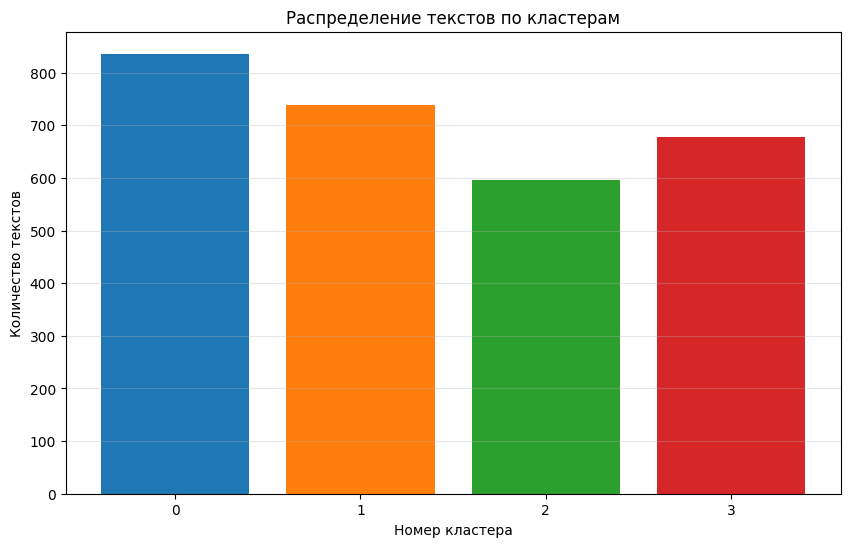


–°–†–ï–î–ù–ò–ï –•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ü–û –ö–õ–ê–°–¢–ï–†–ê–ú
   –ö–ª–∞—Å—Ç–µ—Ä  –°–∏–º–≤–æ–ª—ã  –°–ª–æ–≤–∞  –õ–µ–∫—Å.—Ä–∞–∑–Ω–æ–æ–±—Ä.  –°—Ä.–¥–ª–∏–Ω–∞ —Å–ª–æ–≤–∞
0        0   387.35  54.94            0.93            6.10
1        1   351.14  50.81            0.93            5.95
2        2   421.81  58.13            0.92            6.32
3        3   370.03  53.02            0.93            6.02


/tmp/ipython-input-8-4004531978.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='–ö–ª–∞—Å—Ç–µ—Ä', y=metric, data=cluster_metrics, palette='tab10')
/tmp/ipython-input-8-4004531978.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='–ö–ª–∞—Å—Ç–µ—Ä', y=metric, data=cluster_metrics, palette='tab10')
/tmp/ipython-input-8-4004531978.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='–ö–ª–∞—Å—Ç–µ—Ä', y=metric, data=cluster_metrics, palette='tab10')
/tmp/ipython-input-8-4004531978.py:76: FutureWarning: 

Passing `palette` without ass

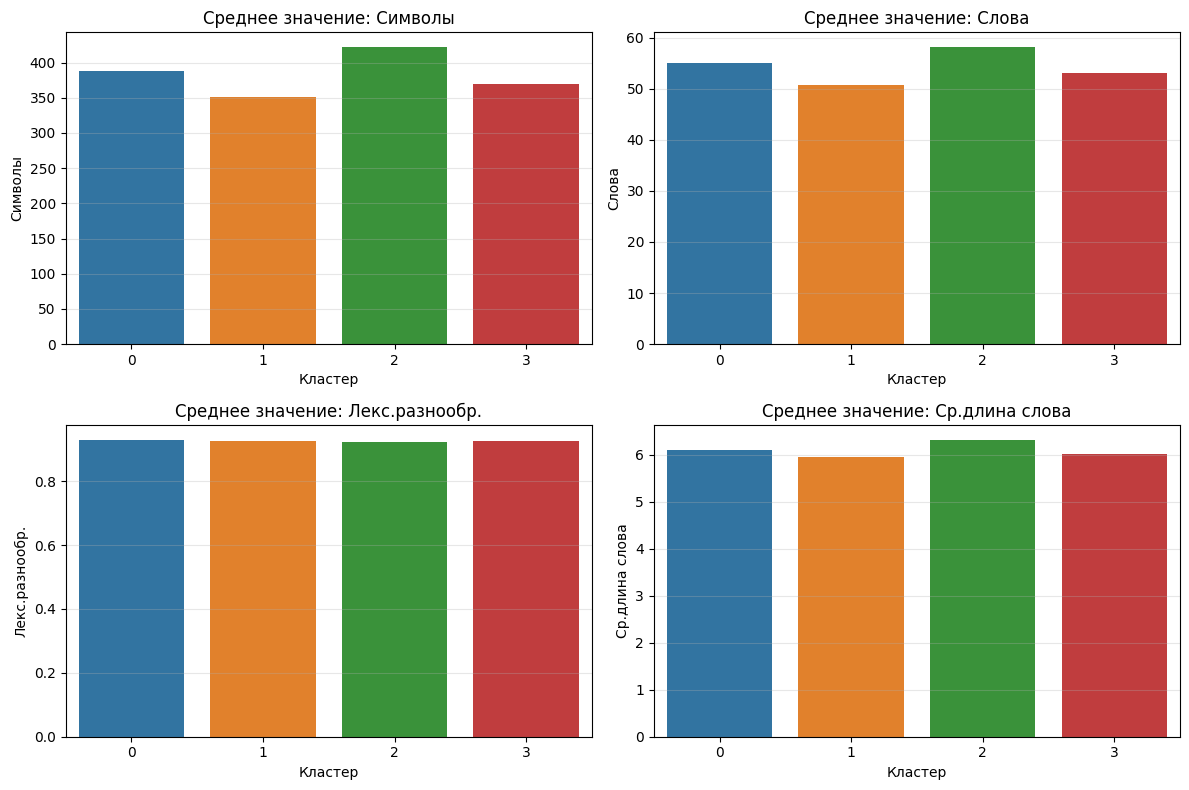

In [ ]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
def show_cluster_info(df, text_col='processed_text', title_col='–ó–∞–≥–æ–ª–æ–≤–æ–∫', n_top_words=15):
    russian_stop_words = get_stop_words('russian')

    print("\n" + "="*50)
    print("–ê–ù–ê–õ–ò–ó –ö–õ–ê–°–¢–ï–†–û–í")
    print("="*50)

    cluster_stats = []

    for c in sorted(df['cluster'].unique()):
        cluster_df = df[df['cluster'] == c]
        cluster_size = len(cluster_df)
        cluster_stats.append((c, cluster_size))

        print(f"\n### –ö–ª–∞—Å—Ç–µ—Ä {c} ({cluster_size} —Ç–µ–∫—Å—Ç–æ–≤, {cluster_size/total_texts:.1%} –¥–∞–Ω–Ω—ã—Ö):")

        # –ò–∑–≤–ª–µ–∫–∞–µ–º —Ç–µ–∫—Å—Ç—ã –∫–ª–∞—Å—Ç–µ—Ä–∞
        cluster_texts = cluster_df[text_col].dropna().astype(str).tolist()

        if not cluster_texts:
            print('–ù–µ—Ç —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞!')
            continue

        # –ê–Ω–∞–ª–∏–∑ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ —á–µ—Ä–µ–∑ TF-IDF
        try:
            vectorizer = TfidfVectorizer(max_features=500, stop_words=russian_stop_words)
            tfidf_matrix = vectorizer.fit_transform(cluster_texts)
            words = vectorizer.get_feature_names_out()
            scores = tfidf_matrix.mean(axis=0).A1
            indices = scores.argsort()[::-1][:n_top_words]
            top_words = [words[i] for i in indices]

            print(f'üîë –ö–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞: {", ".join(top_words)}')
        except ValueError:
            print("‚ö†Ô∏è –ù–µ —É–¥–∞–ª–æ—Å—å –∏–∑–≤–ª–µ—á—å –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ (–≤–æ–∑–º–æ–∂–Ω–æ, –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω–∞—è –ª–µ–∫—Å–∏–∫–∞)")

        # –ü—Ä–∏–º–µ—Ä—ã –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤
        titles = cluster_df[title_col].dropna().astype(str).tolist()[:20]
        print("\nüìù –ü—Ä–∏–º–µ—Ä—ã –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤:")
        for i, title in enumerate(titles, 1):
            print(f" {i}. {title}")

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    plt.figure(figsize=(10, 6))
    clusters, counts = zip(*sorted(cluster_stats, key=lambda x: x[0]))
    plt.bar([str(c) for c in clusters], counts, color=plt.cm.tab10.colors[:len(clusters)])
    plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º')
    plt.xlabel('–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞')
    plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–∫—Å—Ç–æ–≤')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

# –í—ã–∑—ã–≤–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∞–Ω–∞–ª–∏–∑–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
show_cluster_info(df)

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑: —Å—Ä–µ–¥–Ω–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
print("\n" + "="*50)
print("–°–†–ï–î–ù–ò–ï –•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ü–û –ö–õ–ê–°–¢–ï–†–ê–ú")
print("="*50)

cluster_metrics = df.groupby('cluster').agg({
    'char_length': 'mean',
    'word_count': 'mean',
    'lexical_diversity': 'mean',
    'avg_word_length': 'mean'
}).reset_index()

cluster_metrics.columns = ['–ö–ª–∞—Å—Ç–µ—Ä', '–°–∏–º–≤–æ–ª—ã', '–°–ª–æ–≤–∞', '–õ–µ–∫—Å.—Ä–∞–∑–Ω–æ–æ–±—Ä.', '–°—Ä.–¥–ª–∏–Ω–∞ —Å–ª–æ–≤–∞']
print(cluster_metrics.round(2))

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–µ—Ç—Ä–∏–∫
plt.figure(figsize=(12, 8))
for i, metric in enumerate(['–°–∏–º–≤–æ–ª—ã', '–°–ª–æ–≤–∞', '–õ–µ–∫—Å.—Ä–∞–∑–Ω–æ–æ–±—Ä.', '–°—Ä.–¥–ª–∏–Ω–∞ —Å–ª–æ–≤–∞'], 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='–ö–ª–∞—Å—Ç–µ—Ä', y=metric, data=cluster_metrics, palette='tab10')
    plt.title(f'–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {metric}')
    plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


–í–≤–µ–¥–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤: 5

–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Å 5 –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏...
–°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å –ø–æ–º–æ—â—å—é t-SNE...


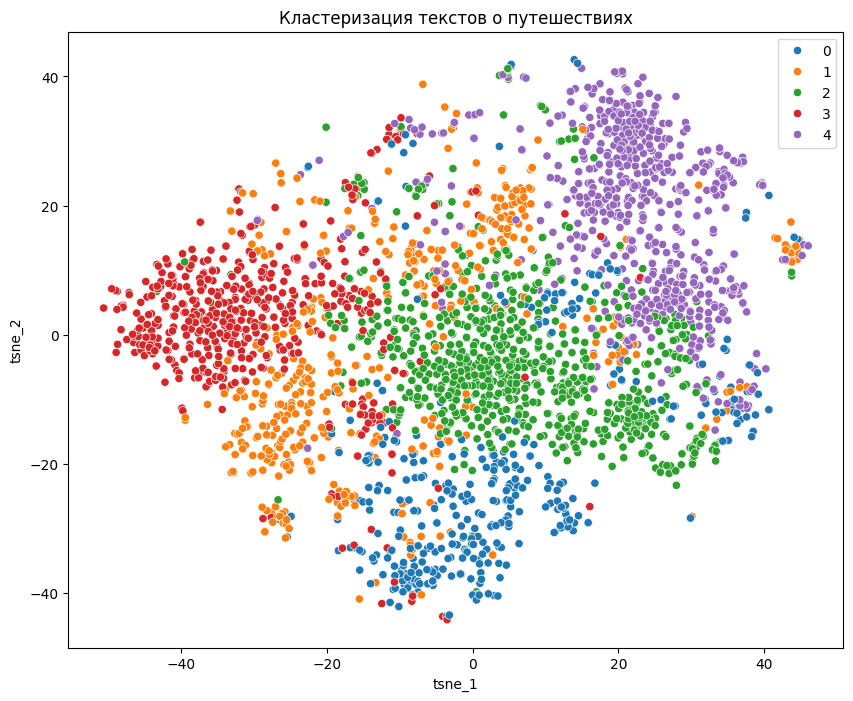

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ Go_Russia_clusters.csv

–ü—Ä–∏–º–µ—Ä—ã —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º:

Cluster 0 (407 —Ç–µ–∫—Å—Ç–æ–≤):
 1. –ö–∞–∫ –∂–µ –∫—Ä–∞—Å–∏–≤–æ –≤ –ê–¥—ã–≥–µ–µ
 2. –ó–æ–ª–æ—Ç–æ–π —Ä–∞—Å—Å–≤–µ—Ç –≤ –ö–∞—Ä–µ–ª–∏–∏
 3. –†–∞—Å—Å–≤–µ—Ç—ã –Ω–∞ –£—Å—å–≤–∏–Ω—Å–∫–∏—Ö —Å—Ç–æ–ª–±–∞—Ö
 4. –ù–µ–æ–±—ã–∫–Ω–æ–≤–µ–Ω–Ω–∞—è –æ—Å–µ–Ω—å –Ω–∞ –ö–æ–ª—å—Å–∫–æ–º –ø–æ–ª—É–æ—Å—Ç—Ä–æ–≤–µ
 5. –ú–∞–ª–∏–Ω–æ–≤—ã–π –∑–∞–∫–∞—Ç –Ω–∞ –¢–µ–ª–µ—Ü–∫–æ–º

Cluster 1 (507 —Ç–µ–∫—Å—Ç–æ–≤):
 1. –†–∞–±–æ—Ç–∞ –Ω–∞ –Æ–≥–µ. –¢–û–ü-15 –í–∞–∫–∞–Ω—Å–∏–π
 2. –ö—É–¥–∞ –¥–µ—Ç–∏ –ø–µ—Ä–µ–≤–æ–∑—è—Ç —Å–≤–æ–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π? –ì–¥–µ –ø—Ä–æ–≤–µ—Å—Ç–∏ —Å—Ç–∞—Ä–æ—Å—Ç—å –≤ –†–æ—Å—Å–∏–∏?
 3. –õ—É—á—à–∏–π –≥–æ—Ä–æ–¥ –†–æ—Å—Å–∏–∏. –†–µ–π—Ç–∏–Ω–≥
 4. –ü–æ—á–µ–º—É –ª—é–¥–∏ –ø–µ—Ä–µ–µ–∑–∂–∞—é—Ç –≤ –¥—Ä—É–≥–∏–µ –≥–æ—Ä–æ–¥–∞
 5. –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π —Å—Ç–∞–ª —Å–∞–º—ã–º –ø—Ä–∏–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–º —Ä–µ–≥–∏–æ–Ω–æ–º –¥–ª—è –ø–µ—Ä–µ–µ–∑–¥–∞

Cluster 2 (786 —Ç–µ–∫—Å—Ç–æ–≤):
 1. –í–æ–ª—à–µ–±–Ω–æ–

In [ ]:
# –í–´–ë–û–† –ß–ò–°–õ–ê –ö–õ–ê–°–¢–ï–†–û–í –ø–æ –∞–Ω–∞–ª–∏–∑—É –≥—Ä–∞—Ñ–∏–∫–æ–≤
NUM_CLUSTERS = int(input("\n–í–≤–µ–¥–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤: "))

# 4. –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Å –≤—ã–±—Ä–∞–Ω–Ω—ã–º —á–∏—Å–ª–æ–º –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
print(f"\n–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Å {NUM_CLUSTERS} –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏...")
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings)
df['cluster'] = clusters

# 5. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –Ω–∞ –ø–ª–æ—Å–∫–æ—Å—Ç–∏
print("–°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å –ø–æ–º–æ—â—å—é t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
emb_2d = tsne.fit_transform(embeddings)

df['tsne_1'] = emb_2d[:, 0]
df['tsne_2'] = emb_2d[:, 1]

plt.figure(figsize=(10,8))
sns.scatterplot(x=df['tsne_1'], y=df['tsne_2'], hue=clusters, palette='tab10', legend='full')
plt.title('–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤ –æ –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏—è—Ö')
plt.show()

# 6. –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ç–∞–±–ª–∏—Ü—É
df.to_csv('Go_Russia_clusters.csv', index=False)
print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ Go_Russia_clusters.csv")

# 7. –ü—Ä–æ—Å–º–æ—Ç—Ä –ø—Ä–∏–º–µ—Ä–æ–≤ –∏–∑ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞
print("\n–ü—Ä–∏–º–µ—Ä—ã —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º:")
for i in range(NUM_CLUSTERS):
    cluster_size = len(df[df['cluster'] == i])
    print(f"\nCluster {i} ({cluster_size} —Ç–µ–∫—Å—Ç–æ–≤):")
    cluster_examples = df[df['cluster'] == i]['–ó–∞–≥–æ–ª–æ–≤–æ–∫'].head(5).tolist()
    for j, example in enumerate(cluster_examples, 1):
        print(f' {j}. {example}')


–ê–ù–ê–õ–ò–ó –ö–õ–ê–°–¢–ï–†–û–í

### –ö–ª–∞—Å—Ç–µ—Ä 0 (407 —Ç–µ–∫—Å—Ç–æ–≤, 14.3% –¥–∞–Ω–Ω—ã—Ö):
üîë –ö–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞: –≥–æ—Ä–æ–¥, –∑–∏–º–∞, –∑–∏–º–Ω–∏–π, –ø–∞—Ä–∫, –≥–æ—Ä–∞, —Å–Ω–µ–≥, –æ—Å–µ–Ω—å, —É—Ç—Ä–æ, —Ä–æ—Å—Å–∏—è, —Ä–∞—Å—Å–≤–µ—Ç, –º–µ—Å—Ç–æ, –≤–µ—á–µ—Ä, –Ω–æ–≤—ã–π, –Ω–µ–±–æ, –Ω–æ–≤–æ–≥–æ–¥–Ω–∏–π

üìù –ü—Ä–∏–º–µ—Ä—ã –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤:
 1. –ö–∞–∫ –∂–µ –∫—Ä–∞—Å–∏–≤–æ –≤ –ê–¥—ã–≥–µ–µ
 2. –ó–æ–ª–æ—Ç–æ–π —Ä–∞—Å—Å–≤–µ—Ç –≤ –ö–∞—Ä–µ–ª–∏–∏
 3. –†–∞—Å—Å–≤–µ—Ç—ã –Ω–∞ –£—Å—å–≤–∏–Ω—Å–∫–∏—Ö —Å—Ç–æ–ª–±–∞—Ö
 4. –ù–µ–æ–±—ã–∫–Ω–æ–≤–µ–Ω–Ω–∞—è –æ—Å–µ–Ω—å –Ω–∞ –ö–æ–ª—å—Å–∫–æ–º –ø–æ–ª—É–æ—Å—Ç—Ä–æ–≤–µ
 5. –ú–∞–ª–∏–Ω–æ–≤—ã–π –∑–∞–∫–∞—Ç –Ω–∞ –¢–µ–ª–µ—Ü–∫–æ–º
 6. –õ–æ–≤–∏–º –≤–æ–ª–Ω—É —É—Ö–æ–¥—è—â–µ–≥–æ –ª–µ—Ç–∞
 7. –ö–∞–∫ –≤—Å–µ–≥–¥–∞ –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–π –∑–∞–∫–∞—Ç –≤—Å—Ç—Ä–µ—á–∞–µ–º –Ω–∞ –ø–ª–∞—Ç–æ –ë–µ—Ä–º–∞–º—ã—Ç!
 8. –ù–µ–∑–∞–±—ã–≤–∞–µ–º—ã–µ –∫—Ä–∞—Å–∫–∏ –ô–æ—à–∫–∞—Ä-–û–ª—ã
 9. –°—É–ø–µ—Ä–ª—É–Ω–∏–µ
 10. –ó–æ–ª–æ—Ç–∞—è –æ—Å–µ–Ω—å –≤ –ü–µ—Ä–º—Å–∫–æ–º –∫—Ä–∞–µ. –°–∫–æ—Ä–æ
 11. –û—Å–µ–Ω

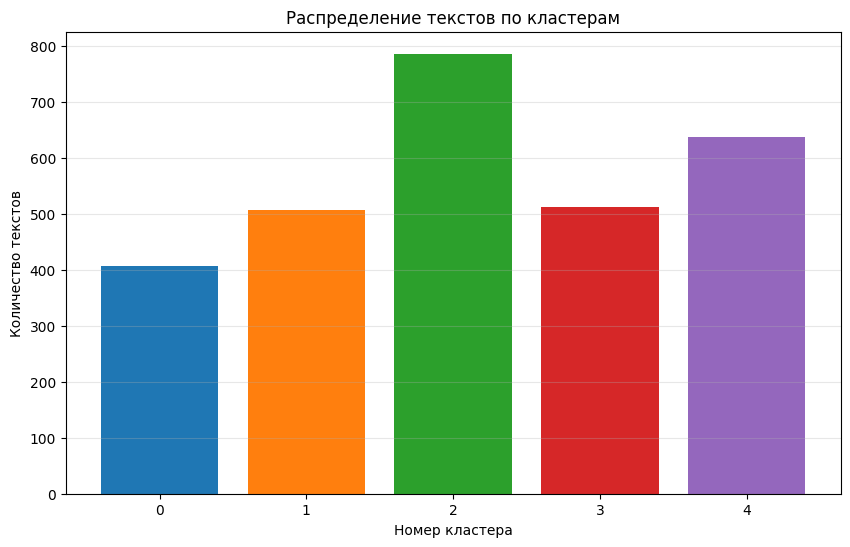


–°–†–ï–î–ù–ò–ï –•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ü–û –ö–õ–ê–°–¢–ï–†–ê–ú
   –ö–ª–∞—Å—Ç–µ—Ä  –°–∏–º–≤–æ–ª—ã  –°–ª–æ–≤–∞  –õ–µ–∫—Å.—Ä–∞–∑–Ω–æ–æ–±—Ä.  –°—Ä.–¥–ª–∏–Ω–∞ —Å–ª–æ–≤–∞
0        0   263.46  38.13            0.95            5.95
1        1   459.05  66.08            0.91            5.99
2        2   384.35  54.42            0.93            6.11
3        3   410.80  56.29            0.92            6.35
4        4   366.19  52.52            0.93            6.01


/tmp/ipython-input-10-4004531978.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='–ö–ª–∞—Å—Ç–µ—Ä', y=metric, data=cluster_metrics, palette='tab10')
/tmp/ipython-input-10-4004531978.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='–ö–ª–∞—Å—Ç–µ—Ä', y=metric, data=cluster_metrics, palette='tab10')
/tmp/ipython-input-10-4004531978.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='–ö–ª–∞—Å—Ç–µ—Ä', y=metric, data=cluster_metrics, palette='tab10')
/tmp/ipython-input-10-4004531978.py:76: FutureWarning: 

Passing `palette` without

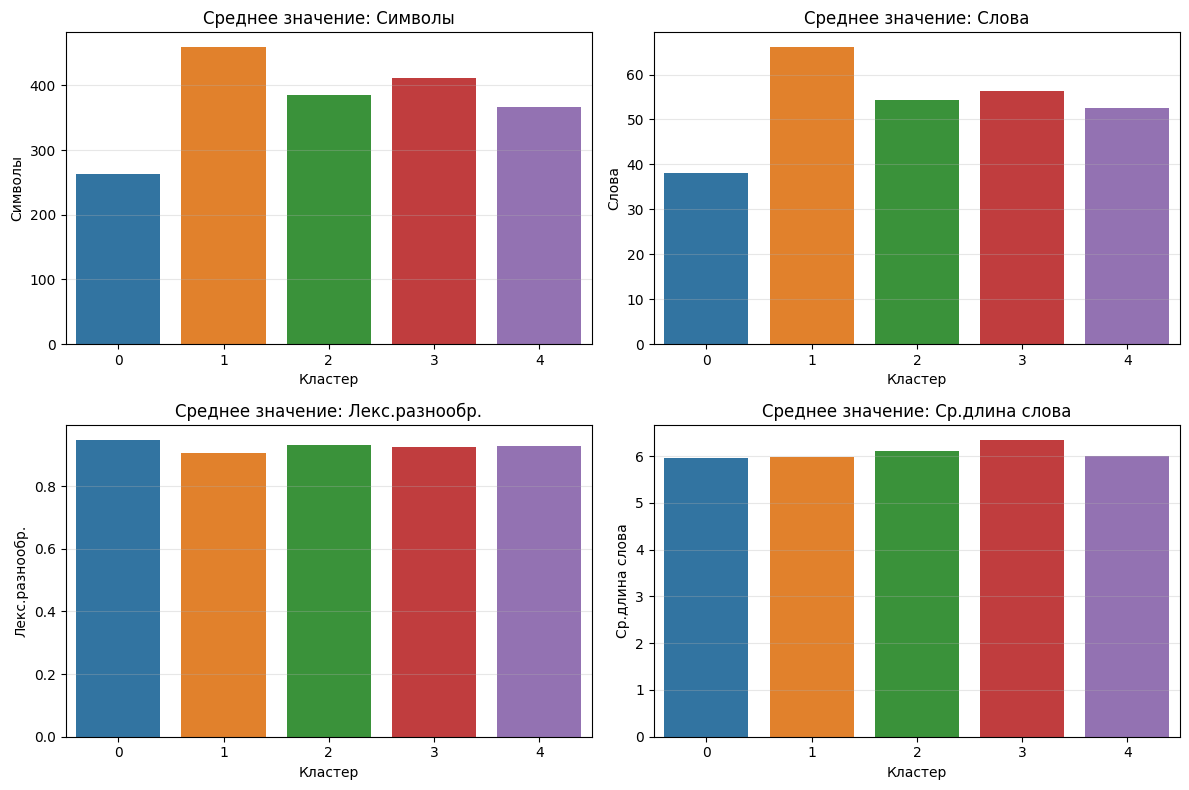

In [ ]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
def show_cluster_info(df, text_col='processed_text', title_col='–ó–∞–≥–æ–ª–æ–≤–æ–∫', n_top_words=15):
    russian_stop_words = get_stop_words('russian')

    print("\n" + "="*50)
    print("–ê–ù–ê–õ–ò–ó –ö–õ–ê–°–¢–ï–†–û–í")
    print("="*50)

    cluster_stats = []

    for c in sorted(df['cluster'].unique()):
        cluster_df = df[df['cluster'] == c]
        cluster_size = len(cluster_df)
        cluster_stats.append((c, cluster_size))

        print(f"\n### –ö–ª–∞—Å—Ç–µ—Ä {c} ({cluster_size} —Ç–µ–∫—Å—Ç–æ–≤, {cluster_size/total_texts:.1%} –¥–∞–Ω–Ω—ã—Ö):")

        # –ò–∑–≤–ª–µ–∫–∞–µ–º —Ç–µ–∫—Å—Ç—ã –∫–ª–∞—Å—Ç–µ—Ä–∞
        cluster_texts = cluster_df[text_col].dropna().astype(str).tolist()

        if not cluster_texts:
            print('–ù–µ—Ç —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞!')
            continue

        # –ê–Ω–∞–ª–∏–∑ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ —á–µ—Ä–µ–∑ TF-IDF
        try:
            vectorizer = TfidfVectorizer(max_features=500, stop_words=russian_stop_words)
            tfidf_matrix = vectorizer.fit_transform(cluster_texts)
            words = vectorizer.get_feature_names_out()
            scores = tfidf_matrix.mean(axis=0).A1
            indices = scores.argsort()[::-1][:n_top_words]
            top_words = [words[i] for i in indices]

            print(f'üîë –ö–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞: {", ".join(top_words)}')
        except ValueError:
            print("‚ö†Ô∏è –ù–µ —É–¥–∞–ª–æ—Å—å –∏–∑–≤–ª–µ—á—å –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ (–≤–æ–∑–º–æ–∂–Ω–æ, –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω–∞—è –ª–µ–∫—Å–∏–∫–∞)")

        # –ü—Ä–∏–º–µ—Ä—ã –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤
        titles = cluster_df[title_col].dropna().astype(str).tolist()[:20]
        print("\nüìù –ü—Ä–∏–º–µ—Ä—ã –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤:")
        for i, title in enumerate(titles, 1):
            print(f" {i}. {title}")

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
    plt.figure(figsize=(10, 6))
    clusters, counts = zip(*sorted(cluster_stats, key=lambda x: x[0]))
    plt.bar([str(c) for c in clusters], counts, color=plt.cm.tab10.colors[:len(clusters)])
    plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º')
    plt.xlabel('–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞')
    plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–∫—Å—Ç–æ–≤')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

# –í—ã–∑—ã–≤–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∞–Ω–∞–ª–∏–∑–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
show_cluster_info(df)

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑: —Å—Ä–µ–¥–Ω–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
print("\n" + "="*50)
print("–°–†–ï–î–ù–ò–ï –•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ü–û –ö–õ–ê–°–¢–ï–†–ê–ú")
print("="*50)

cluster_metrics = df.groupby('cluster').agg({
    'char_length': 'mean',
    'word_count': 'mean',
    'lexical_diversity': 'mean',
    'avg_word_length': 'mean'
}).reset_index()

cluster_metrics.columns = ['–ö–ª–∞—Å—Ç–µ—Ä', '–°–∏–º–≤–æ–ª—ã', '–°–ª–æ–≤–∞', '–õ–µ–∫—Å.—Ä–∞–∑–Ω–æ–æ–±—Ä.', '–°—Ä.–¥–ª–∏–Ω–∞ —Å–ª–æ–≤–∞']
print(cluster_metrics.round(2))

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–µ—Ç—Ä–∏–∫
plt.figure(figsize=(12, 8))
for i, metric in enumerate(['–°–∏–º–≤–æ–ª—ã', '–°–ª–æ–≤–∞', '–õ–µ–∫—Å.—Ä–∞–∑–Ω–æ–æ–±—Ä.', '–°—Ä.–¥–ª–∏–Ω–∞ —Å–ª–æ–≤–∞'], 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='–ö–ª–∞—Å—Ç–µ—Ä', y=metric, data=cluster_metrics, palette='tab10')
    plt.title(f'–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {metric}')
    plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()